In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from itertools import combinations
import keras
from IPython.display import display

In [ ]:
import pandas as pd
import numpy as np
Vehicle = pd.read_csv
Household=pd.read_csv
Pop=pd.read_csv
Inc=pd.read_csv

In [ ]:
def calculate_new_column_value(row):
    veh_year = row['VEHYEAR']
    hfuel = row['HFUEL']
    fegempg = row['FEGEMPG']
    fegempga = row['FEGEMPGA']

    if veh_year <= 2008:
        if hfuel == 2:
            return 10779 * fegempga ** -0.994
        else:
            return 10779 * fegempg ** -0.994
    elif veh_year in [2009, 2010]:
        if hfuel == 2:
            return 8858.7 * fegempga ** -0.996
        else:
            return 8858.7 * fegempg ** -0.996
    elif veh_year in [2011, 2012]:
        if hfuel == 2:
            return 8770.9 * fegempga ** -0.993
        else:
            return 8770.9 * fegempg ** -0.993
    elif veh_year == 2013:
        if hfuel == 2:
            return 7954.4 * fegempga ** -0.972
        else:
            return 7954.4 * fegempg ** -0.972
    elif veh_year == 2014:
        if hfuel == 2:
            return 8710.2 * fegempga ** -0.993
        else:
            return 8710.2 * fegempg ** -0.993
    elif veh_year == 2015:
        if hfuel == 2:
            return 8748.6 * fegempga ** -0.995
        else:
            return 8748.6 * fegempg ** -0.995
    elif veh_year == 2016:
        if hfuel == 2:
            return 8760.5 * fegempga ** -0.995
        else:
            return 8760.5* fegempg ** -0.995
    elif veh_year == 2017:
        if hfuel == 2:
            return 8762.4 * fegempga ** -0.995
        else:
            return 8762.4 * fegempg ** -0.995
    # Add more conditions for other years as needed
    else:
        return 0  # Default value if year is not specified or condition not met

In [ ]:
Vehicle['Gas_Emission'] = Vehicle.apply(lambda row: "{:.2f}".format(calculate_new_column_value(row)), axis=1)

In [ ]:
# Remove rows where VEHYEAR is -8 or -7
Vehicle = Vehicle.loc[~Vehicle['VEHYEAR'].isin([-8, -7])]
# Reset the index if desired
Vehicle.reset_index(drop=True, inplace=True)

In [ ]:
Vehicle.loc[Vehicle['HFUEL'].isin([2,3]), 'Gas_Emission'] = 0

In [ ]:
# Remove rows where BESTMILE is -9 or 0
Vehicle = Vehicle[(Vehicle['BESTMILE'] != -9) & (Vehicle['BESTMILE'] != 0)]
# Reset the index of the modified dataframe
Vehicle.reset_index(drop=True, inplace=True)

In [ ]:
# Convert columns to numeric data types
Vehicle['BESTMILE'] = pd.to_numeric(Vehicle['BESTMILE'], errors='coerce')
Vehicle['Gas_Emission'] = pd.to_numeric(Vehicle['Gas_Emission'], errors='coerce')

Non-numeric values in BESTMILE column:
Series([], Name: BESTMILE, dtype: float64)

Non-numeric values in Gas_Emission column:
Series([], Name: Gas_Emission, dtype: float64)


In [ ]:
# Create the Annual_emission column
Vehicle['Gasoline_emission'] = Vehicle['BESTMILE'] * Vehicle['Gas_Emission']/(1000*1000)
Vehicle['Annual_emission_upstream'] = 0.25*Vehicle['Gasoline_emission']
Vehicle['Annual_emission'] = Vehicle['Gasoline_emission']+Vehicle['Annual_emission_upstream']
#1gallon=33.7KWH
#119MPGe=33.7KWH
#100mile=xKWH?
#x=33.7*100/119=28KWH/100 Mile = 0.2831KWH/mile = 0.2831*0.001 MWH/mile
# Apply the if-else condition
Vehicle['EV_upstream_emission'] = Vehicle.apply(lambda row: row['EV_upstream_emission'] / row['FEGEMPGA']
                                               if row['HFUEL'] != 3
                                               else row['EV_upstream_emission'] / row['FEGEMPG'],
                                               axis=1)

In [ ]:
elec = pd.read_csv

In [ ]:
merged_df = pd.merge(Vehicle, elec, on='HHSTATE')
#display(merged_df)

In [ ]:
merged_df['CO2e'] = merged_df['CO2e'].str.replace(',', '').astype(float)

In [ ]:
merged_df['EV_upstream_emission'] = np.where((merged_df['HFUEL'] == 2) | (merged_df['HFUEL'] == 3), merged_df['EV_upstream_emission'], 0)
merged_df['EV_upstream_emission'] = pd.to_numeric(merged_df['EV_upstream_emission'], errors='coerce')
merged_df['CO2e'] = pd.to_numeric(merged_df['CO2e'], errors='coerce')
merged_df['EV_upstream_emission_total'] = merged_df['EV_upstream_emission']*merged_df['CO2e']*0.000453592

In [ ]:
# Remove rows where BESTMILE is greater than 25000
merged_df = merged_df[~((merged_df['HFUEL'] == 2) & (merged_df['FEGEMPGA'] < 0))]
# Reset the index if desired
merged_df.reset_index(drop=True, inplace=True)
display(merged_df)

,HOUSEID,VEHID,VEHYEAR,VEHAGE,MAKE,MODEL,FUELTYPE,VEHTYPE,WHOMAIN,OD_READ,HFUEL,VEHOWNED,VEHOWNMO,ANNMILES,HYBRID,PERSONID,TRAVDAY,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,DRVRCNT,HHSTATE,HHSTFIPS,NUMADLT,WRKCOUNT,TDAYDATE,LIF_CYC,MSACAT,MSASIZE,RAIL,URBAN,URBANSIZE,URBRUR,CENSUS_D,CENSUS_R,CDIVMSAR,HH_RACE,HH_HISP,HH_CBSA,SMPLSRCE,WTHHFIN,BESTMILE,BEST_FLG,BEST_EDT,BEST_OUT,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN,GSYRGAL,GSTOTCST,FEGEMPG,FEGEMPGA,GSCOST,FEGEMPGF,Gas_Emission,Gasoline_emission,Annual_emission_upstream,Annual_emission,EV_upstream_emission,CO2,CH4,N2O,CO2e,Annual NOX,Ozone Season NOX,SO2,EV_upstream_emission_total
0,30000007,1,2007,10,49,49032,1,1,3,69000,-1,1,-1,1000,2,3,2,1,3,5,7,3,NC,37,3,1,201608,10,3,1,2,1,1,1,5,3,53,2,2,XXXXX,2,187.314320,14611.926637,1,-1,4,T,50,1500,750,750,20,750,300,487.064221,1126.457778,30,-9,2.31275,1,366.71,5.358340,1.339585,6.697925,0.0,669.5,0.05,0.007,672.7,0.4,0.4,0.224,0.0
1,30000007,2,2004,13,49,49442,1,2,-8,164000,-1,1,-1,2500,2,-8,2,1,3,5,7,3,NC,37,3,1,201608,10,3,1,2,1,1,1,5,3,53,2,2,XXXXX,2,187.314320,4767.090946,3,-1,-1,T,50,1500,750,750,20,750,300,250.899523,580.267873,19,-9,2.31275,1,577.43,2.752661,0.688165,3.440827,0.0,669.5,0.05,0.007,672.7,0.4,0.4,0.224,0.0
2,30000007,3,1998,19,19,19014,1,1,1,120000,-1,1,-1,900,2,1,2,1,3,5,7,3,NC,37,3,1,201608,10,3,1,2,1,1,1,5,3,53,2,2,XXXXX,2,187.314320,8000.324552,1,-1,-1,T,50,1500,750,750,20,750,300,444.462475,1027.930589,18,-9,2.31275,1,609.31,4.874678,1.218669,6.093347,0.0,669.5,0.05,0.007,672.7,0.4,0.4,0.224,0.0
3,30000007,4,1997,20,19,19021,1,1,2,-88,-1,1,-1,500,2,2,2,1,3,5,7,3,NC,37,3,1,201608,10,3,1,2,1,1,1,5,3,53,2,2,XXXXX,2,187.314320,725.932347,2,-1,-1,T,50,1500,750,750,20,750,300,40.329575,93.272224,18,-9,2.31275,1,609.31,0.442318,0.110579,0.552897,0.0,669.5,0.05,0.007,672.7,0.4,0.4,0.224,0.0
4,30000007,5,1993,24,20,20481,1,4,2,300000,-1,1,-1,10000,2,2,2,1,3,5,7,3,NC,37,3,1,201608,10,3,1,2,1,1,1,5,3,53,2,2,XXXXX,2,187.314320,12437.658757,1,-1,-1,T,50,1500,750,750,20,750,300,888.404197,2054.656806,14,-9,2.31275,1,782.22,9.728985,2.432246,12.161232,0.0,669.5,0.05,0.007,672.7,0.4,0.4,0.224,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249030,40794301,1,2012,5,37,37441,1,2,1,60976,-1,1,-1,9500,2,1,2,1,7,5,6,4,NC,37,4,1,201701,6,3,1,2,4,6,2,5,3,53,1,2,XXXXX,2,126.720282,15291.933714,1,-1,-1,R,20,50,50,25,20,300,50,695.087896,1607.564532,22,-9,2.31275,1,407.40,6.229934,1.557483,7.787417,0.0,669.5,0.05,0.007,672.7,0.4,0.4,0.224,0.0
249031,40794301,2,2005,12,49,49032,1,1,4,93388,-1,2,10,9600,2,4,2,1,7,5,6,4,NC,37,4,1,201701,6,3,1,2,4,6,2,5,3,53,1,2,XXXXX,2,126.720282,15050.341184,1,-1,-1,R,20,50,50,25,20,300,50,518.977282,1200.264709,29,-9,2.31275,1,379.28,5.708293,1.427073,7.135367,0.0,669.5,0.05,0.007,672.7,0.4,0.4,0.224,0.0
249032,40794301,3,1996,21,35,35443,1,2,3,143616,-1,1,-1,6200,2,3,2,1,7,5,6,4,NC,37,4,1,201701,6,3,1,2,4,6,2,5,3,53,1,2,XXXXX,2,126.720282,8886.193545,1,-1,-1,R,20,50,50,25,20,300,50,493.677419,1141.752451,18,-9,2.31275,1,609.31,5.414447,1.353612,6.768058,0.0,669.5,0.05,0.007,672.7,0.4,0.4,0.224,0.0
249033,40794301,4,1991,26,49,49471,1,4,2,195078,-1,1,-1,-9,2,2,2,1,7,5,6,4,NC,37,4,1,201701,6,3,1,2,4,6,2,5,3,53,1,2,XXXXX,2,126.720282,7756.187889,1,-1,-1,R,20,50,50,25,20,300,50,387.809394,896.906177,20,-9,2.31275,2,548.72,4.255975,1.063994,5.319969,0.0,669.5,0.05,0.007,672.7,0.4,0.4,0.224,0.0


In [ ]:
merged_df.loc[merged_df['HFUEL'].isin([2,3]), 'Annual_emission'] = 0
merged_df.loc[merged_df['HFUEL'].isin([-1,4]), 'EV_upstream_emission_total'] = 0

In [ ]:
# Assuming your filtered data is in a DataFrame called 'filtered_df'

# List of columns to keep in the new DataFrame
keep_columns = ['HHFAMINC','HHSTATE','WTHHFIN','HBHUR']

# Create a new DataFrame by grouping and summarizing the data
summary_df = merged_df.groupby('HOUSEID').agg({
    'Annual_emission': 'sum',
    'EV_upstream_emission_total': 'sum',
    'FEGEMPG':'mean',
    'BESTMILE': 'sum',
    **{column: 'first' for column in keep_columns}
}).reset_index()

display(summary_df)

,HOUSEID,Annual_emission,EV_upstream_emission_total,FEGEMPG,BESTMILE,HHFAMINC,HHSTATE,WTHHFIN,HBHUR
0,30000007,28.946227,0.000000,19.800000,40542.933239,7,NC,187.314320,T
1,30000008,21.972893,0.000000,22.500000,34861.663511,8,WI,69.513032,R
2,30000012,5.889452,0.000000,18.500000,8619.468100,10,NY,79.419586,C
3,30000019,12.997627,0.000000,21.500000,19861.243792,3,MD,279.143588,S
4,30000029,6.316725,0.000000,20.500000,14112.999569,5,WI,103.240304,S
...,...,...,...,...,...,...,...,...,...
122681,40794260,3.887381,0.000000,19.000000,6591.993622,11,TX,212.213018,S
122682,40794291,2.092779,0.000000,23.000000,3505.859688,9,CA,41.869638,S
122683,40794293,12.994438,0.000000,19.333333,18303.466640,6,NC,166.016235,R
122684,40794294,4.607049,1.201271,33.000000,27223.379464,10,CA,207.672765,U


In [ ]:
summary_df['Household_emission'] = summary_df['Annual_emission']+summary_df['EV_upstream_emission_total']

In [ ]:
merged_df2 = pd.merge(Household,summary_df, on='HOUSEID', how='left').fillna(0)

In [ ]:
#Include weights

merged_df2 ['Weighted_emission'] =merged_df2 ['Household_emission']*merged_df2 ['WTHHFIN_x']
merged_df2 ['Weighted_Miles'] =merged_df2 ['BESTMILE']*merged_df2['WTHHFIN_x']
merged_df2 ['Weighted_efficiency'] =merged_df2 ['FEGEMPG']*merged_df2['WTHHFIN_x']

In [ ]:
summary_df=merged_df2[['HHFAMINC_x','HHSTATE_x','WTHHFIN_x','HBHUR_x','HOUSEID','Household_emission','BESTMILE','FEGEMPG','Weighted_emission','Weighted_Miles','Weighted_efficiency']]

,HHFAMINC_x,HHSTATE_x,WTHHFIN_x,HBHUR_x,HOUSEID,Household_emission,BESTMILE,FEGEMPG,Weighted_emission,Weighted_Miles,Weighted_efficiency
0,7,NC,187.314320,T,30000007,28.946227,40542.933239,19.800000,5422.042909,7.594272e+06,3708.823534
1,8,WI,69.513032,R,30000008,21.972893,34861.663511,22.500000,1527.402398,2.423340e+06,1564.043223
2,10,NY,79.419586,C,30000012,5.889452,8619.468100,18.500000,467.737807,6.845546e+05,1469.262342
3,3,MD,279.143588,S,30000019,12.997627,19861.243792,21.500000,3628.204129,5.544139e+06,6001.587151
4,5,WI,103.240304,S,30000029,6.316725,14112.999569,20.500000,652.140598,1.457030e+06,2116.426229
...,...,...,...,...,...,...,...,...,...,...,...
129691,9,CA,41.869638,S,40794291,2.092779,3505.859688,23.000000,87.623904,1.467891e+05,963.001676
129692,6,NC,166.016235,R,40794293,12.994438,18303.466640,19.333333,2157.287594,3.038673e+06,3209.647200
129693,10,CA,207.672765,U,40794294,5.808320,27223.379464,33.000000,1206.229948,5.653554e+06,6853.201244
129694,6,NC,126.720282,R,40794301,35.627554,60795.475064,22.200000,4514.733697,7.704020e+06,2813.190269


In [ ]:
# Grouping the data by HHSTATE and calculating the sum of relevant columns
grouped_data = summary_df.agg({'Weighted_Miles': 'sum', 'WTHHFIN_x': 'sum', 'Weighted_efficiency': 'sum', 'Weighted_emission': 'sum'})

# Calculating weighted miles per household
grouped_data['Weighted_Miles_Per_Household'] = grouped_data['Weighted_Miles'] / grouped_data['WTHHFIN_x']

# Calculating average efficiency
grouped_data['Average_Efficiency'] = grouped_data['Weighted_efficiency'] / grouped_data['WTHHFIN_x']

# Calculating average emissions
grouped_data['Average_Emissions'] = grouped_data['Weighted_emission'] / grouped_data['WTHHFIN_x']

# Displaying the results
display(grouped_data)

,0
Weighted_Miles,2.427000e+12
WTHHFIN_x,1.182083e+08
Weighted_efficiency,2.405738e+09
Weighted_emission,1.471263e+09
Weighted_Miles_Per_Household,2.053156e+04
Average_Efficiency,2.035169e+01
Average_Emissions,1.244636e+01


In [ ]:
# Grouping the data by HHSTATE and calculating the sum of relevant columns
grouped_data = summary_df.groupby('HHSTATE_x').agg({'Weighted_Miles': 'sum', 'WTHHFIN_x': 'sum', 'Weighted_efficiency': 'sum', 'Weighted_emission': 'sum'})

# Calculating weighted miles per household
grouped_data['Weighted_Miles_Per_Household'] = grouped_data['Weighted_Miles'] / grouped_data['WTHHFIN_x']

# Calculating average efficiency
grouped_data['Average_Efficiency'] = grouped_data['Weighted_efficiency'] / grouped_data['WTHHFIN_x']

# Calculating average emissions
grouped_data['Average_Emissions'] = grouped_data['Weighted_emission'] / grouped_data['WTHHFIN_x']

# Displaying the results
#display(grouped_data)

In [ ]:
merged_df3 = pd.merge(grouped_data,Pop, on='HHSTATE_x')

In [ ]:
merged_df3['Total_emission']=merged_df3['Average_Emissions']*merged_df3['Household_No.']

In [ ]:
# Grouping the data by HHSTATE and calculating the sum of relevant columns
grouped_data2 = summary_df.groupby('HHFAMINC_x').agg({'Weighted_Miles': 'sum', 'WTHHFIN_x': 'sum', 'Weighted_efficiency': 'sum', 'Weighted_emission': 'sum'})

# Calculating weighted miles per household
grouped_data2['Weighted_Miles_Per_Household'] = grouped_data2['Weighted_Miles'] / grouped_data2['WTHHFIN_x']

# Calculating average efficiency
grouped_data2['Average_Efficiency'] = grouped_data2['Weighted_efficiency'] / grouped_data2['WTHHFIN_x']

# Calculating average emissions
grouped_data2['Average_Emissions'] = grouped_data2['Weighted_emission'] / grouped_data2['WTHHFIN_x']
grouped_data2 =grouped_data2.iloc[3:]

,Weighted_Miles,WTHHFIN_x,Weighted_efficiency,Weighted_emission,Weighted_Miles_Per_Household,Average_Efficiency,Average_Emissions
HHFAMINC_x,,,,,,,
1,7.040402e+10,8.607121e+06,1.023171e+08,4.428302e+07,8179.741266,11.887490,5.144928
2,6.887338e+10,6.900342e+06,1.048496e+08,4.460566e+07,9981.155840,15.194845,6.464269
3,1.496332e+11,1.120173e+07,2.140901e+08,9.552303e+07,13358.049270,19.112235,8.527526
4,1.848235e+11,1.147109e+07,2.355326e+08,1.144954e+08,16112.112362,20.532717,9.981219
5,2.724668e+11,1.416885e+07,3.048351e+08,1.693147e+08,19229.989249,21.514453,11.949782
6,4.253739e+11,1.895294e+07,4.106488e+08,2.618129e+08,22443.696742,21.666767,13.813844
7,3.526434e+11,1.409148e+07,3.102125e+08,2.120932e+08,25025.289630,22.014187,15.051165
8,3.003546e+11,1.074918e+07,2.406219e+08,1.781092e+08,27942.094140,22.385143,16.569560
9,1.823724e+11,6.131339e+06,1.391735e+08,1.058660e+08,29744.300825,22.698716,17.266384


In [ ]:
Inc= Inc.set_index('HHFAMINC').rename_axis('HHFAMINC_x')
merged_df4 = pd.merge(grouped_data2,Inc, on='HHFAMINC_x')

,Weighted_Miles,WTHHFIN_x,Weighted_efficiency,Weighted_emission,Weighted_Miles_Per_Household,Average_Efficiency,Average_Emissions,Income
HHFAMINC_x,,,,,,,,
1,7.040402e+10,8.607121e+06,1.023171e+08,4.428302e+07,8179.741266,11.887490,5.144928,6957000
2,6.887338e+10,6.900342e+06,1.048496e+08,4.460566e+07,9981.155840,15.194845,6.464269,5309000
3,1.496332e+11,1.120173e+07,2.140901e+08,9.552303e+07,13358.049270,19.112235,8.527526,10614000
4,1.848235e+11,1.147109e+07,2.355326e+08,1.144954e+08,16112.112362,20.532717,9.981219,10268000
5,2.724668e+11,1.416885e+07,3.048351e+08,1.693147e+08,19229.989249,21.514453,11.949782,14348000
6,4.253739e+11,1.895294e+07,4.106488e+08,2.618129e+08,22443.696742,21.666767,13.813844,21232000
7,3.526434e+11,1.409148e+07,3.102125e+08,2.120932e+08,25025.289630,22.014187,15.051165,15559000
8,3.003546e+11,1.074918e+07,2.406219e+08,1.781092e+08,27942.094140,22.385143,16.569560,12329000
9,1.823724e+11,6.131339e+06,1.391735e+08,1.058660e+08,29744.300825,22.698716,17.266384,8522000


In [ ]:
merged_df4['Total_emission']=merged_df4['Average_Emissions']*merged_df4['Income']

,Weighted_Miles,WTHHFIN_x,Weighted_efficiency,Weighted_emission,Weighted_Miles_Per_Household,Average_Efficiency,Average_Emissions,Income,Total_emission
HHFAMINC_x,,,,,,,,,
1,7.040402e+10,8.607121e+06,1.023171e+08,4.428302e+07,8179.741266,11.887490,5.144928,6957000,3.579326e+07
2,6.887338e+10,6.900342e+06,1.048496e+08,4.460566e+07,9981.155840,15.194845,6.464269,5309000,3.431880e+07
3,1.496332e+11,1.120173e+07,2.140901e+08,9.552303e+07,13358.049270,19.112235,8.527526,10614000,9.051116e+07
4,1.848235e+11,1.147109e+07,2.355326e+08,1.144954e+08,16112.112362,20.532717,9.981219,10268000,1.024872e+08
5,2.724668e+11,1.416885e+07,3.048351e+08,1.693147e+08,19229.989249,21.514453,11.949782,14348000,1.714555e+08
6,4.253739e+11,1.895294e+07,4.106488e+08,2.618129e+08,22443.696742,21.666767,13.813844,21232000,2.932955e+08
7,3.526434e+11,1.409148e+07,3.102125e+08,2.120932e+08,25025.289630,22.014187,15.051165,15559000,2.341811e+08
8,3.003546e+11,1.074918e+07,2.406219e+08,1.781092e+08,27942.094140,22.385143,16.569560,12329000,2.042861e+08
9,1.823724e+11,6.131339e+06,1.391735e+08,1.058660e+08,29744.300825,22.698716,17.266384,8522000,1.471441e+08


<Figure size 10000x50000 with 0 Axes>

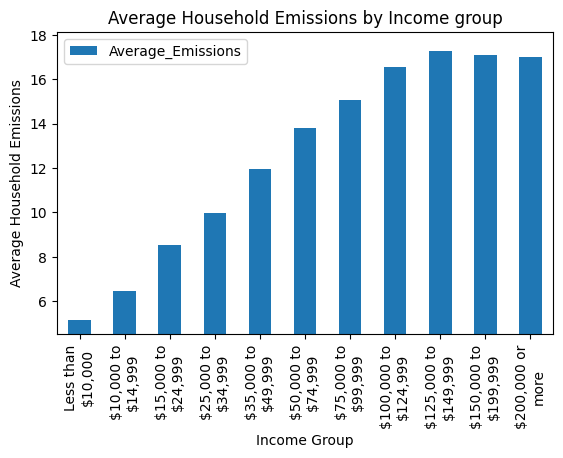

In [ ]:
import textwrap

# Assuming you have a DataFrame called 'data' with an index and a column 'Total_emission'
plt.figure(figsize=(100,500) ) # Adjust the width and height as needed
# Create the bar chart
merged_df4.plot(kind='bar', y='Average_Emissions')

# Set the x-axis label
plt.xlabel('Index')

# Set the y-axis label
plt.ylabel('Average Household Emissions')
plt.xlabel('Income Group')
# Set the title
plt.title('Average Household Emissions by Income group')

# Define the new x tick labels
new_x_tick_labels = [
    'Less than $10,000',
    '$10,000 to $14,999',
    '$15,000 to $24,999',
    '$25,000 to $34,999',
    '$35,000 to $49,999',
    '$50,000 to $74,999',
    '$75,000 to $99,999',
    '$100,000 to $124,999',
    '$125,000 to $149,999',
    '$150,000 to $199,999',
    '$200,000 or more'
]

# Wrap the long x tick labels into multiple lines
wrapped_labels = [textwrap.fill(label, width=12) for label in new_x_tick_labels]

# Get the current x tick positions
current_x_ticks = plt.xticks()[0]

# Set the new x tick labels at the same positions
plt.xticks(current_x_ticks, wrapped_labels)

# Set the y-axis limit to start from 4.5
plt.ylim(4.5, plt.ylim()[1])
plt.subplots_adjust(bottom=0.25)
plt.savefig('bar_chart_average_emissions.jpg', dpi = 600)
# Show the chart
plt.show()


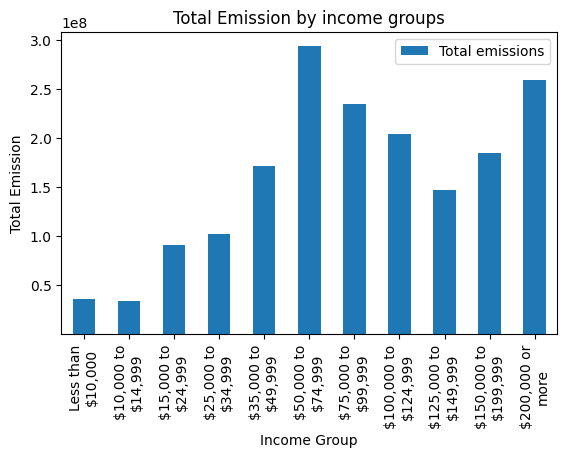

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'data' with an index and a column 'Total_emission'

# Create the bar chart
merged_df4.plot(kind='bar', y='Total_emission')

# Set the x-axis label
plt.xlabel('Income Group')

# Set the y-axis label
plt.ylabel('Total Emission')
plt.legend(['Total emissions'])
# Set the title

plt.title('Total Emission by income groups')
# Define the new x tick labels
new_x_tick_labels = [
    'Less than $10,000',
    '$10,000 to $14,999',
    '$15,000 to $24,999',
    '$25,000 to $34,999',
    '$35,000 to $49,999',
    '$50,000 to $74,999',
    '$75,000 to $99,999',
    '$100,000 to $124,999',
    '$125,000 to $149,999',
    '$150,000 to $199,999',
    '$200,000 or more'
]

# Wrap the long x tick labels into multiple lines
wrapped_labels = [textwrap.fill(label, width=12) for label in new_x_tick_labels]

# Get the current x tick positions
current_x_ticks = plt.xticks()[0]

# Set the new x tick labels at the same positions
plt.xticks(current_x_ticks, wrapped_labels)

# Set the y-axis limit to start from 4.5
plt.ylim(4.5, plt.ylim()[1])
plt.subplots_adjust(bottom=0.25)
plt.savefig('bar_chart_to_emissions2.jpg', dpi = 600)
# Show the chart
plt.show()
# Show the chart
plt.show()

In [ ]:
summary_df3 = Vehicle['VEHYEAR'].agg(['min', 'max', 'mean', 'median'])